In [21]:
# Kevin Richard
# Two-layer Neural network Training

from IPython.display import HTML

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
from IPython import display

from IPython.display import HTML


In [22]:
import numpy as np
import random

X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1], [5, 5], [-5, 5], [-5, -5], [5, -5]])
Y = np.array([[0], [0], [0], [0], [1], [1], [1], [1]])

hidden_layers = 10

weights1 = np.random.uniform(size = (2,hidden_layers)) #hidden
weights2 = np.random.uniform(size = (hidden_layers,1)) #hidden

print("Initial Weights of 1st Layer:\n", weights1)
print("Initial Weights of 2nd Layer:\n", weights2)

epoch =10000
learning_rate = 0.1
b1=np.random.uniform(size =(1,hidden_layers)) #hidden
b2=np.random.uniform(size =(1,1))

def sigmoid(z):
    return 1.0/(1.0  + np.exp(-z) )

def sigmoid_derivative(z):
    return z * (1 - z)

errorList = []

for _ in range(epoch):

    # Prediction of Layer 1
    predictions1 = sigmoid(np.dot(X, weights1) + b1 )
    # Prediction of Layer 2
    predictions2 = sigmoid(np.dot(predictions1, weights2) + b2)

    # error calculation
    error = np.mean(np.abs(Y - predictions2 ))
    errorList.append(error)
    #dpred2 = (predictions2 - Y )

    
    dZ2 = (Y - predictions2  ) * sigmoid_derivative(predictions2)
    dpred1 = dZ2.dot(weights2.T)
    dZ1 = dpred1 * sigmoid_derivative(predictions1)

    # Gradients : this is vital : axis=0, keepdims=True , Figure out why
    gradient2 = predictions1.T.dot(dZ2)
    gradient_bias2 = np.sum(dZ2, axis=0, keepdims=True)
    
    gradient1 = X.T.dot(dZ1)
    gradient_bias1 = np.sum(dZ1, axis=0, keepdims=True)

    # weight & bias updates
    weights2 += gradient2 * learning_rate
    b2 += gradient_bias2 * learning_rate
    
    weights1 += gradient1 * learning_rate
    b1 +=  gradient_bias1 * learning_rate

print("Weights of 1st Layer after Training:\n", weights1)
print("Weights of 2nd Layer after Training:\n", weights2)
print("Error List:\n",errorList)


Initial Weights of 1st Layer:
 [[0.3605874  0.13084311 0.86270228 0.15591683 0.37236842 0.80725702
  0.77216711 0.89042274 0.19367196 0.03829358]
 [0.84059517 0.0555476  0.24497203 0.68551566 0.38087185 0.20911762
  0.02515947 0.8610744  0.74680811 0.96538573]]
Initial Weights of 2nd Layer:
 [[0.11319103]
 [0.93017754]
 [0.67704724]
 [0.90524344]
 [0.35250005]
 [0.10870734]
 [0.59676457]
 [0.81559969]
 [0.71552324]
 [0.16412606]]
Weights of 1st Layer after Training:
 [[ 8.69015631e-02 -3.36937062e-02  1.31704804e+00 -3.64567962e-02
   2.64962125e-01  1.42169135e+00  1.19516304e+00  1.00267425e+00
   4.85563540e-02  4.35617647e-02]
 [ 9.85410708e-01 -3.37453316e-02  4.26706979e-04  1.44837203e+00
   2.51051718e-01  3.33939654e-03  1.93454961e-03  8.95564031e-01
   1.12636678e+00  1.24920492e+00]]
Weights of 2nd Layer after Training:
 [[-1.15023091]
 [ 2.07574139]
 [ 4.54092882]
 [ 5.22209642]
 [ 0.62674941]
 [-3.39432104]
 [-2.01729583]
 [ 1.37270501]
 [-1.97172079]
 [-2.71228857]]
Erro

In [23]:

# Test predictions
predict1 = sigmoid(np.dot(X, weights1)+b1)
predictMain = sigmoid(np.dot(predict1, weights2) + b2)

print("Actual Prediction:\n",predictMain)
predicted=[]

for i in range(len(Y)):
  if predictMain[i] > 0.5:
    predicted.append(1)
  else:
    predicted.append(0)
print("Prediction:\n",predicted)
print("Targets:\n",Y)

Actual Prediction:
 [[0.01677442]
 [0.01791311]
 [0.01364364]
 [0.01528716]
 [0.98265915]
 [0.98224398]
 [0.98019966]
 [0.98154229]]
Prediction:
 [0, 0, 0, 0, 1, 1, 1, 1]
Target [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]


<function matplotlib.pyplot.show(close=None, block=None)>

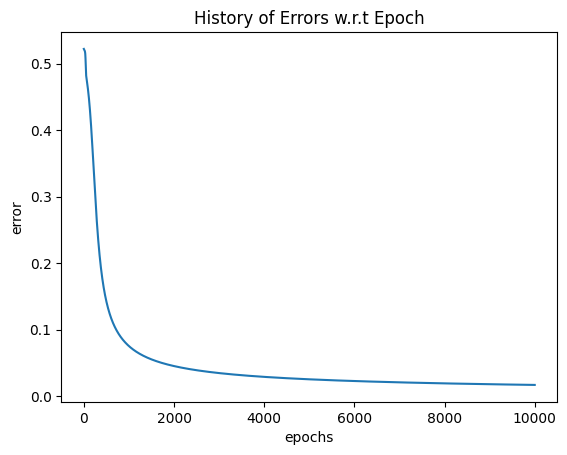

In [24]:
# Error change with epochs
plt.plot(errorList)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("History of Errors w.r.t Epoch")
plt.show
